In [17]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.dates as mdates
import squarify

In [18]:
# Read the city's csv file
diepkloof_df = pd.read_csv("CleanDatasets/diepkloof_AQI.csv")
diepkloof_df = diepkloof_df.sort_values("date")

# diepkloof_df.dtypes
diepkloof_df["date"] = pd.to_datetime(diepkloof_df["date"])
diepkloof_df

,date,pm25,pm10,o3,no2,so2,co,AQI
370,2019-02-01,97,65,10,9,2,7,97
371,2019-02-02,129,52,9,7,2,6,129
372,2019-02-03,111,50,10,7,1,6,111
373,2019-02-05,90,46,11,10,2,7,90
374,2019-02-06,89,48,13,9,1,7,89
...,...,...,...,...,...,...,...,...
13,2020-07-18,119,68,13,13,8,9,119
14,2020-07-19,128,38,12,9,5,6,128
15,2020-07-20,96,37,16,11,3,7,96
16,2020-07-21,105,132,20,13,7,10,132


In [19]:
# Create a data frame for the lockdown period of the city
diepkloof_lockdown_df=diepkloof_df[(diepkloof_df['date']>='2020-03-26') & (diepkloof_df['date']<='2020-04-30')]
diepkloof_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI
109,2020-03-26,51,15,10,8,1,4,51
110,2020-03-27,57,23,10,5,1,2,57
111,2020-03-28,59,14,8,3,1,2,59
112,2020-03-29,54,26,8,3,1,3,54
113,2020-03-30,62,18,6,6,1,3,62
114,2020-03-31,59,26,7,7,1,3,59
115,2020-04-01,70,18,6,5,1,3,70
73,2020-04-02,68,10,4,5,4,2,68
74,2020-04-03,36,14,4,6,1,3,36
75,2020-04-04,38,22,4,8,1,4,38


In [20]:
# Set date as index
diepkloof_lockdown_df = diepkloof_lockdown_df.set_index("date")


In [21]:
# Create a data frame for the 2019 data, same months as the lockdown period in 2020
diepkloof_2019_df=diepkloof_df[(diepkloof_df['date']>='2019-03-26') & (diepkloof_df['date']<='2019-04-30')]

In [22]:
# Set date as index
diepkloof_2019_df = diepkloof_2019_df.set_index("date")


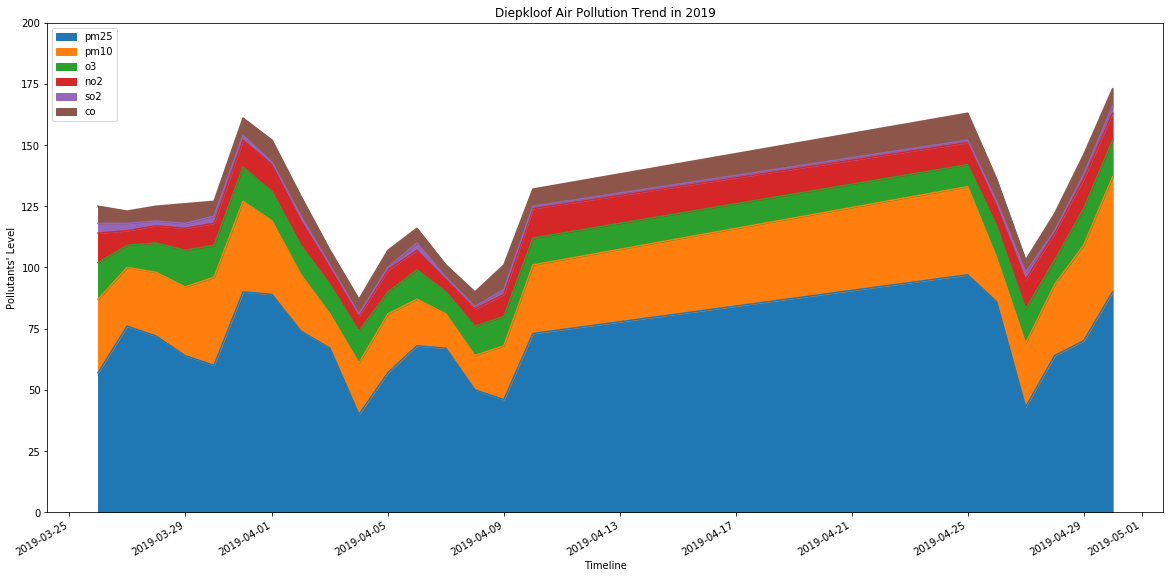

In [23]:
# Create an stacked area chart for the pollutant levels in 2019
ax = diepkloof_2019_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,200)
# Creat tite, x and y label
plt.title("Diepkloof Air Pollution Trend in 2019")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()


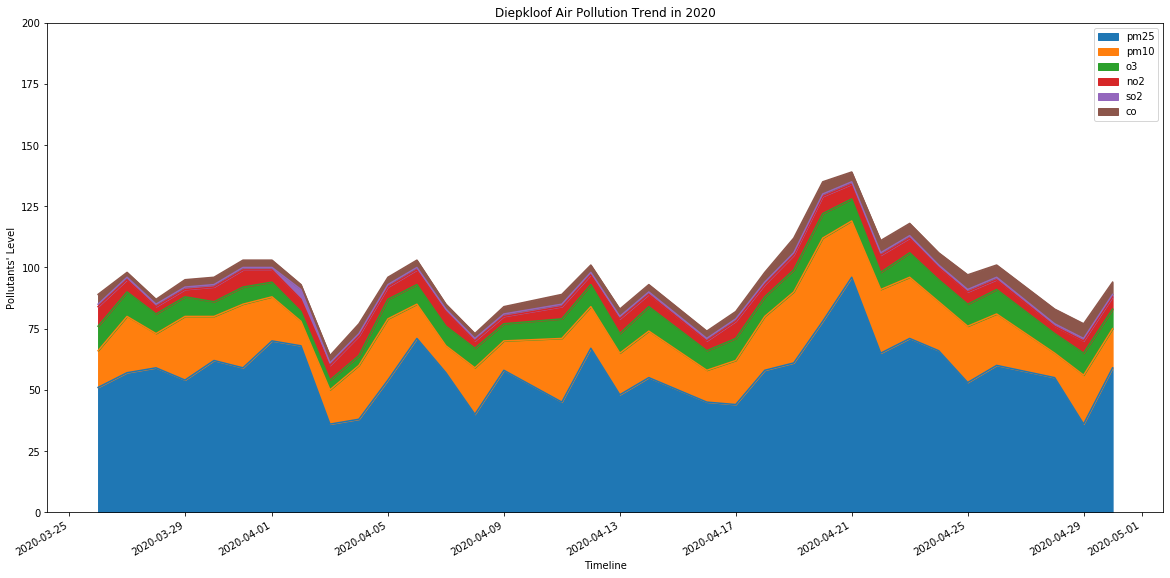

In [24]:
# Create an stacked area chart for the pollutant levels in 2019
ax = diepkloof_lockdown_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,200)
# Creat tite, x and y label
plt.title("Diepkloof Air Pollution Trend in 2020")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

In [25]:
# Compute quartiles and upper and lower bounds for pm25 in 2019
diepkloof_2019_quartiles = diepkloof_2019_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_2019_lowerq = diepkloof_2019_quartiles[0.25]

# Compute the upper quartile
diepkloof_2019_upperq = diepkloof_2019_quartiles[0.75]
diepkloof_2019_iqr = diepkloof_2019_upperq-diepkloof_2019_lowerq
print(f"The lower quartile of diepkloof_2019  is: {diepkloof_2019_lowerq}")
print(f"The upper quartile of diepkloof_2019 is: {diepkloof_2019_upperq}")
print(f"The interquartile range of diepkloof_2019 is: {diepkloof_2019_iqr}")
lower_bound = diepkloof_2019_lowerq - (1.5*diepkloof_2019_iqr)
upper_bound = diepkloof_2019_upperq + (1.5*diepkloof_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_diepkloof_2019 = diepkloof_2019_df.loc[(diepkloof_2019_df["pm25"] < lower_bound) | (diepkloof_2019_df["pm25"] > upper_bound)]
outlier_diepkloof_2019

The lower quartile of diepkloof_2019  is: 57.75
The upper quartile of diepkloof_2019 is: 75.5
The interquartile range of diepkloof_2019 is: 17.75
Values below 31.125 could be outliers.
Values above 102.125 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [26]:
# Compute quartiles and upper and lower bounds for pm10
diepkloof_2019_quartiles = diepkloof_2019_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_2019_lowerq = diepkloof_2019_quartiles[0.25]

# Compute the upper quartile
diepkloof_2019_upperq = diepkloof_2019_quartiles[0.75]
diepkloof_2019_iqr = diepkloof_2019_upperq-diepkloof_2019_lowerq
print(f"The lower quartile of diepkloof_2019  is: {diepkloof_2019_lowerq}")
print(f"The upper quartile of diepkloof_2019 is: {diepkloof_2019_upperq}")
print(f"The interquartile range of diepkloof_2019 is: {diepkloof_2019_iqr}")
lower_bound = diepkloof_2019_lowerq - (1.5*diepkloof_2019_iqr)
upper_bound = diepkloof_2019_upperq + (1.5*diepkloof_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_diepkloof_2019 = diepkloof_2019_df.loc[(diepkloof_2019_df["pm10"] < lower_bound) | (diepkloof_2019_df["pm10"] > upper_bound)]
outlier_diepkloof_2019

The lower quartile of diepkloof_2019  is: 21.25
The upper quartile of diepkloof_2019 is: 30.0
The interquartile range of diepkloof_2019 is: 8.75
Values below 8.125 could be outliers.
Values above 43.125 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-04-30,90,47,15,11,3,7,90


In [27]:
# Compute quartiles and upper and lower bounds for o3
diepkloof_2019_quartiles = diepkloof_2019_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_2019_lowerq = diepkloof_2019_quartiles[0.25]

# Compute the upper quartile
diepkloof_2019_upperq = diepkloof_2019_quartiles[0.75]
diepkloof_2019_iqr = diepkloof_2019_upperq-diepkloof_2019_lowerq
print(f"The lower quartile of diepkloof_2019  is: {diepkloof_2019_lowerq}")
print(f"The upper quartile of diepkloof_2019 is: {diepkloof_2019_upperq}")
print(f"The interquartile range of diepkloof_2019 is: {diepkloof_2019_iqr}")
lower_bound = diepkloof_2019_lowerq - (1.5*diepkloof_2019_iqr)
upper_bound = diepkloof_2019_upperq + (1.5*diepkloof_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_diepkloof_2019 = diepkloof_2019_df.loc[(diepkloof_2019_df["o3"] < lower_bound) | (diepkloof_2019_df["o3"] > upper_bound)]
outlier_diepkloof_2019

The lower quartile of diepkloof_2019  is: 11.25
The upper quartile of diepkloof_2019 is: 13.75
The interquartile range of diepkloof_2019 is: 2.5
Values below 7.5 could be outliers.
Values above 17.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [28]:
# Compute quartiles and upper and lower bounds for no2
diepkloof_2019_quartiles = diepkloof_2019_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_2019_lowerq = diepkloof_2019_quartiles[0.25]

# Compute the upper quartile
diepkloof_2019_upperq = diepkloof_2019_quartiles[0.75]
diepkloof_2019_iqr = diepkloof_2019_upperq-diepkloof_2019_lowerq
print(f"The lower quartile of diepkloof_2019  is: {diepkloof_2019_lowerq}")
print(f"The upper quartile of diepkloof_2019 is: {diepkloof_2019_upperq}")
print(f"The interquartile range of diepkloof_2019 is: {diepkloof_2019_iqr}")
lower_bound = diepkloof_2019_lowerq - (1.5*diepkloof_2019_iqr)
upper_bound = diepkloof_2019_upperq + (1.5*diepkloof_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_diepkloof_2019 = diepkloof_2019_df.loc[(diepkloof_2019_df["no2"] < lower_bound) | (diepkloof_2019_df["no2"] > upper_bound)]
outlier_diepkloof_2019

The lower quartile of diepkloof_2019  is: 7.25
The upper quartile of diepkloof_2019 is: 11.0
The interquartile range of diepkloof_2019 is: 3.75
Values below 1.625 could be outliers.
Values above 16.625 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [29]:
# Compute quartiles and upper and lower bounds for so2
diepkloof_2019_quartiles = diepkloof_2019_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_2019_lowerq = diepkloof_2019_quartiles[0.25]

# Compute the upper quartile
diepkloof_2019_upperq = diepkloof_2019_quartiles[0.75]
diepkloof_2019_iqr = diepkloof_2019_upperq-diepkloof_2019_lowerq
print(f"The lower quartile of diepkloof_2019  is: {diepkloof_2019_lowerq}")
print(f"The upper quartile of diepkloof_2019 is: {diepkloof_2019_upperq}")
print(f"The interquartile range of diepkloof_2019 is: {diepkloof_2019_iqr}")
lower_bound = diepkloof_2019_lowerq - (1.5*diepkloof_2019_iqr)
upper_bound = diepkloof_2019_upperq + (1.5*diepkloof_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_diepkloof_2019 = diepkloof_2019_df.loc[(diepkloof_2019_df["so2"] < lower_bound) | (diepkloof_2019_df["so2"] > upper_bound)]
outlier_diepkloof_2019

The lower quartile of diepkloof_2019  is: 1.0
The upper quartile of diepkloof_2019 is: 2.75
The interquartile range of diepkloof_2019 is: 1.75
Values below -1.625 could be outliers.
Values above 5.375 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [30]:
# Compute quartiles and upper and lower bounds for co
diepkloof_2019_quartiles = diepkloof_2019_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_2019_lowerq = diepkloof_2019_quartiles[0.25]

# Compute the upper quartile
diepkloof_2019_upperq = diepkloof_2019_quartiles[0.75]
diepkloof_2019_iqr = diepkloof_2019_upperq-diepkloof_2019_lowerq
print(f"The lower quartile of diepkloof_2019  is: {diepkloof_2019_lowerq}")
print(f"The upper quartile of diepkloof_2019 is: {diepkloof_2019_upperq}")
print(f"The interquartile range of diepkloof_2019 is: {diepkloof_2019_iqr}")
lower_bound = diepkloof_2019_lowerq - (1.5*diepkloof_2019_iqr)
upper_bound = diepkloof_2019_upperq + (1.5*diepkloof_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_diepkloof_2019 = diepkloof_2019_df.loc[(diepkloof_2019_df["co"] < lower_bound) | (diepkloof_2019_df["co"] > upper_bound)]
outlier_diepkloof_2019

The lower quartile of diepkloof_2019  is: 6.0
The upper quartile of diepkloof_2019 is: 8.0
The interquartile range of diepkloof_2019 is: 2.0
Values below 3.0 could be outliers.
Values above 11.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


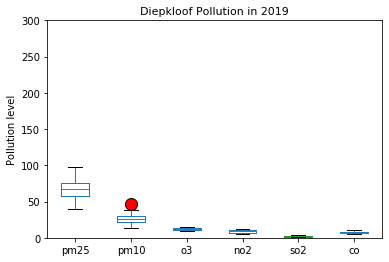

In [31]:
# Create a box plot with outliers

# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = diepkloof_2019_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)
# Set y limit
plt.ylim(0,300)
# Set the title and y axis label
box_plot.set_title('Diepkloof Pollution in 2019', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [32]:
# Compute quartiles and upper and lower bounds for pm25
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["pm25"] < lower_bound) | (diepkloof_lockdown_df["pm25"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 51.0
The upper quartile of diepkloof in lockdown is: 65.0
The interquartile range of diepkloof in lockdown is: 14.0
Values below 30.0 could be outliers.
Values above 86.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-04-21,96,23,9,6,1,4,96


In [33]:
# Compute quartiles and upper and lower bounds for pm10
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["pm10"] < lower_bound) | (diepkloof_lockdown_df["pm10"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 15.0
The upper quartile of diepkloof in lockdown is: 23.0
The interquartile range of diepkloof in lockdown is: 8.0
Values below 3.0 could be outliers.
Values above 35.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [34]:
# Compute quartiles and upper and lower bounds for o3
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["o3"] < lower_bound) | (diepkloof_lockdown_df["o3"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 8.0
The upper quartile of diepkloof in lockdown is: 9.0
The interquartile range of diepkloof in lockdown is: 1.0
Values below 6.5 could be outliers.
Values above 10.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-30,62,18,6,6,1,3,62
2020-04-01,70,18,6,5,1,3,70
2020-04-02,68,10,4,5,4,2,68
2020-04-03,36,14,4,6,1,3,36
2020-04-04,38,22,4,8,1,4,38


In [35]:
# Compute quartiles and upper and lower bounds for no2
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["no2"] < lower_bound) | (diepkloof_lockdown_df["no2"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 5.0
The upper quartile of diepkloof in lockdown is: 6.0
The interquartile range of diepkloof in lockdown is: 1.0
Values below 3.5 could be outliers.
Values above 7.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-26,51,15,10,8,1,4,51
2020-03-28,59,14,8,3,1,2,59
2020-03-29,54,26,8,3,1,3,54
2020-04-04,38,22,4,8,1,4,38
2020-04-08,40,19,8,3,1,2,40
2020-04-09,58,12,7,3,1,3,58
2020-04-28,55,10,8,3,1,6,55


In [36]:
# Compute quartiles and upper and lower bounds for so2
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["so2"] < lower_bound) | (diepkloof_lockdown_df["so2"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 1.0
The upper quartile of diepkloof in lockdown is: 1.0
The interquartile range of diepkloof in lockdown is: 0.0
Values below 1.0 could be outliers.
Values above 1.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-04-02,68,10,4,5,4,2,68


In [37]:
# Compute quartiles and upper and lower bounds for co
diepkloof_lockdown_quartiles =diepkloof_lockdown_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
diepkloof_lockdown_lowerq = diepkloof_lockdown_quartiles[0.25]

# Compute the upper quartile
diepkloof_lockdown_upperq = diepkloof_lockdown_quartiles[0.75]
diepkloof_lockdown_iqr = diepkloof_lockdown_upperq-diepkloof_lockdown_lowerq
print(f"The lower quartile of diepkloof in lockdown is: {diepkloof_lockdown_lowerq}")
print(f"The upper quartile of diepkloof in lockdown is: {diepkloof_lockdown_upperq}")
print(f"The interquartile range of diepkloof in lockdown is: {diepkloof_lockdown_iqr}")
lower_bound = diepkloof_lockdown_lowerq - (1.5*diepkloof_lockdown_iqr)
upper_bound =diepkloof_lockdown_upperq + (1.5*diepkloof_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_diepkloof_lockdown = diepkloof_lockdown_df.loc[(diepkloof_lockdown_df["co"] < lower_bound) | (diepkloof_lockdown_df["co"] > upper_bound)]
outlier_diepkloof_lockdown

The lower quartile of diepkloof in lockdown is: 3.0
The upper quartile of diepkloof in lockdown is: 5.0
The interquartile range of diepkloof in lockdown is: 2.0
Values below 0.0 could be outliers.
Values above 8.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


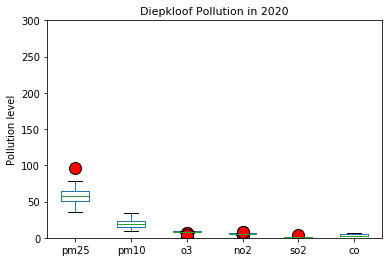

In [38]:
# Create a box plot with outliers

# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = diepkloof_lockdown_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)
# Set y limit
plt.ylim(0,300)
# Set the title and y axis label
box_plot.set_title('Diepkloof Pollution in 2020', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [39]:
# Reset index
diepkloof_lockdown_df = diepkloof_lockdown_df.reset_index("date")


In [40]:
# Extract the month-day from the date and create a new column
diepkloof_lockdown_df["new_date"] = diepkloof_lockdown_df["date"].dt.strftime("%m-%d")
diepkloof_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2020-03-26,51,15,10,8,1,4,51,03-26
1,2020-03-27,57,23,10,5,1,2,57,03-27
2,2020-03-28,59,14,8,3,1,2,59,03-28
3,2020-03-29,54,26,8,3,1,3,54,03-29
4,2020-03-30,62,18,6,6,1,3,62,03-30
5,2020-03-31,59,26,7,7,1,3,59,03-31
6,2020-04-01,70,18,6,5,1,3,70,04-01
7,2020-04-02,68,10,4,5,4,2,68,04-02
8,2020-04-03,36,14,4,6,1,3,36,04-03
9,2020-04-04,38,22,4,8,1,4,38,04-04


In [41]:
# Reset index
diepkloof_2019_df = diepkloof_2019_df.reset_index("date")


In [42]:

# Extract the month-day from the date and create a new column
diepkloof_2019_df["new_date"] = diepkloof_2019_df["date"].dt.strftime("%m-%d")
diepkloof_2019_df

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2019-03-26,57,30,15,12,4,7,57,03-26
1,2019-03-27,76,24,9,6,3,5,76,03-27
2,2019-03-28,72,26,12,7,2,6,72,03-28
3,2019-03-29,64,28,15,9,2,8,64,03-29
4,2019-03-30,60,36,13,9,3,6,60,03-30
5,2019-03-31,90,37,14,11,2,7,90,03-31
6,2019-04-01,89,30,12,11,1,9,89,04-01
7,2019-04-02,74,23,12,10,2,8,74,04-02
8,2019-04-03,67,14,12,7,1,6,67,04-03
9,2019-04-04,40,21,13,6,1,6,40,04-04


In [43]:
# Merge two data sets
new_diepkloof_df = diepkloof_2019_df.merge(diepkloof_lockdown_df, on= "new_date")
new_diepkloof_df.head()

,date_x,pm25_x,pm10_x,o3_x,no2_x,so2_x,co_x,AQI_x,new_date,date_y,pm25_y,pm10_y,o3_y,no2_y,so2_y,co_y,AQI_y
0,2019-03-26,57,30,15,12,4,7,57,03-26,2020-03-26,51,15,10,8,1,4,51
1,2019-03-27,76,24,9,6,3,5,76,03-27,2020-03-27,57,23,10,5,1,2,57
2,2019-03-28,72,26,12,7,2,6,72,03-28,2020-03-28,59,14,8,3,1,2,59
3,2019-03-29,64,28,15,9,2,8,64,03-29,2020-03-29,54,26,8,3,1,3,54
4,2019-03-30,60,36,13,9,3,6,60,03-30,2020-03-30,62,18,6,6,1,3,62


In [44]:
# Rename the columns for intuitive naming
new_diepkloof_df = new_diepkloof_df.rename(columns={'date_x':'Date 2019', 'pm25_x':'2019 pm25', 'pm10_x':'2019 pm10', 'o3_x':'2019 o3', 'no2_x':'2019 no2', 'so2_x':'2019 so2', 'co_x':'2019 co', 'AQI_x':'2019 AQI', 'date_y':'Date 2020', 'pm25_y':'2020 pm25', 'pm10_y':'2020 pm10', 'o3_y':'2020 o3', 'no2_y':'2020 no2', 'so2_y':'2020 so2', 'co_y':'2020 co', 'AQI_y':'2020 AQI'})
new_diepkloof_df.head()

,Date 2019,2019 pm25,2019 pm10,2019 o3,2019 no2,2019 so2,2019 co,2019 AQI,new_date,Date 2020,2020 pm25,2020 pm10,2020 o3,2020 no2,2020 so2,2020 co,2020 AQI
0,2019-03-26,57,30,15,12,4,7,57,03-26,2020-03-26,51,15,10,8,1,4,51
1,2019-03-27,76,24,9,6,3,5,76,03-27,2020-03-27,57,23,10,5,1,2,57
2,2019-03-28,72,26,12,7,2,6,72,03-28,2020-03-28,59,14,8,3,1,2,59
3,2019-03-29,64,28,15,9,2,8,64,03-29,2020-03-29,54,26,8,3,1,3,54
4,2019-03-30,60,36,13,9,3,6,60,03-30,2020-03-30,62,18,6,6,1,3,62


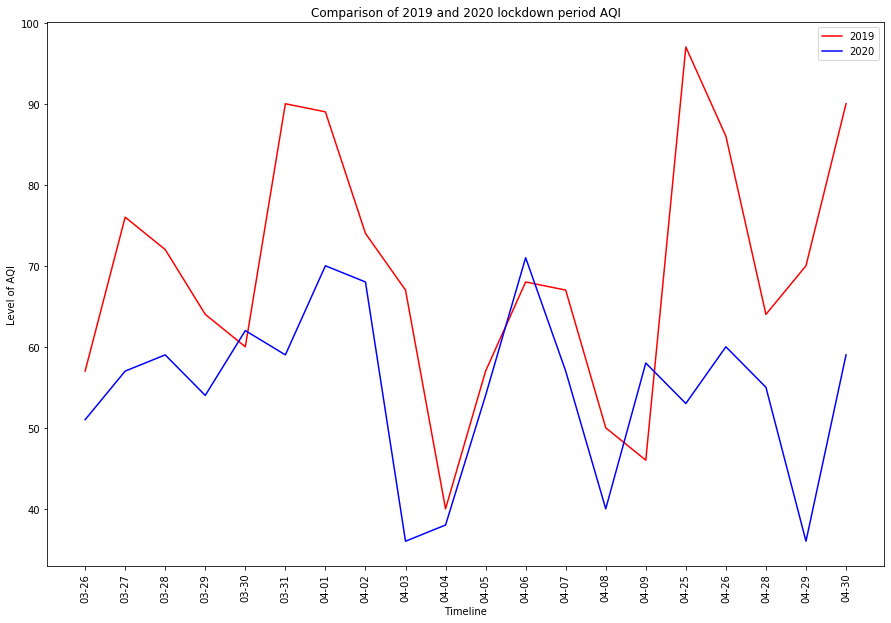

In [45]:
x_axis=new_diepkloof_df["new_date"]
y_axis=new_diepkloof_df["2019 AQI"]
x2=new_diepkloof_df["new_date"]
y2=new_diepkloof_df["2020 AQI"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
diepkloof_2019, = plt.plot(x_axis,y_axis, color="red", label="2019")
diepkloof_2020, = plt.plot(x2,y2,  color="blue", label="2020")

# Create a legend for our chart
plt.legend(handles=[diepkloof_2019, diepkloof_2020], loc="best")
plt.title("Comparison of 2019 and 2020 lockdown period AQI")
plt.xlabel("Timeline")
plt.ylabel("Level of AQI")
plt.show()

In [46]:
# Compute a mean of the pollutants during the same months in 2019 as lockdown period in 2020
diepkloof_2019_mean = diepkloof_2019_df.mean()
diepkloof_2019_mean[0:6]

pm25    68.181818
pm10    26.590909
o3      12.181818
no2      9.136364
so2      1.909091
co       7.090909
dtype: float64

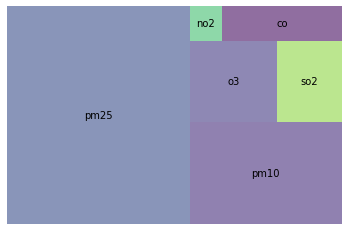

In [50]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=diepkloof_2019_mean[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.show()

In [51]:
# Compute a mean of the pollutants during the lockdown period
diepkloof_lockdown_mean =diepkloof_lockdown_df.mean()
diepkloof_lockdown_mean[0:6]

pm25    57.454545
pm10    19.575758
o3       8.000000
no2      5.272727
so2      1.090909
co       3.727273
dtype: float64

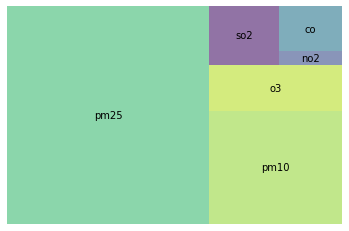

In [52]:
# Create a treemap for the pollutants for the lockdown period in 2020
squarify.plot(sizes=diepkloof_lockdown_mean[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.show()